# Predicting survival on the Titanic

### Step 1: Framing the Problem

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

###  Step 2: Data collection

In [2]:
train_set = pd.read_csv('./train.csv', index_col = 0);
test_set = pd.read_csv('./test.csv', index_col = 0);

In [3]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  Step 3: Data clearning

In [4]:
train_set.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There is 3 columns have missing values: Age, Cabin, Embarked
Although we know how many values are missing in each column, it is essential to know the percentage of them against the total values. 

In [5]:
100 * train_set.isnull().sum() / len(train_set)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

It is clear that 77% of the ‘Cabin’ Column is missing, which is a very significant percentage. Age has around 19% of data missing and Embarked has only 0.2% missing. This is the quantitative analysis of missing data we have. 

<AxesSubplot:>

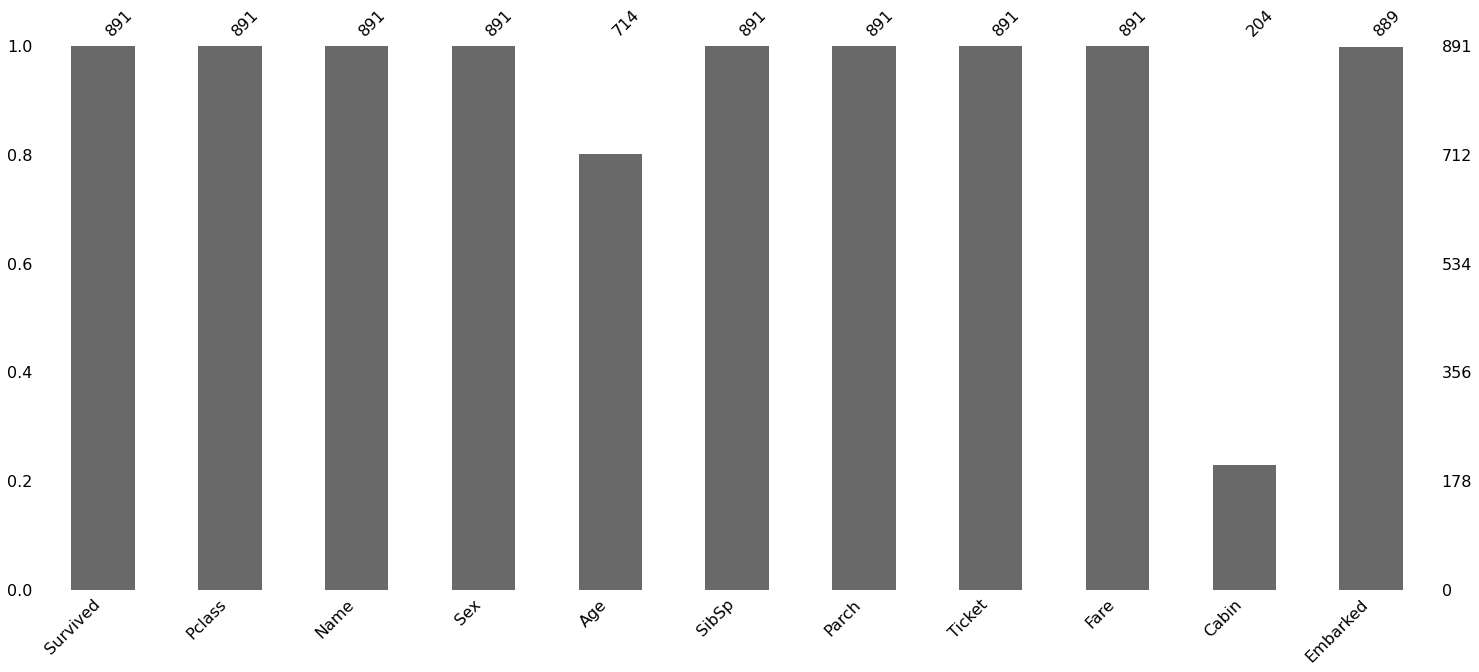

In [6]:
# missingno is a  python package especially for visualizing and exploring the missing data of a dataset.
import missingno as msno
msno.bar(train_set)

Next, we can plot the matrix visualization. This helps us to know how the missing data is distributed through the data, that is if they are localized or evenly spread, or is there any pattern and many such questions.

<AxesSubplot:>

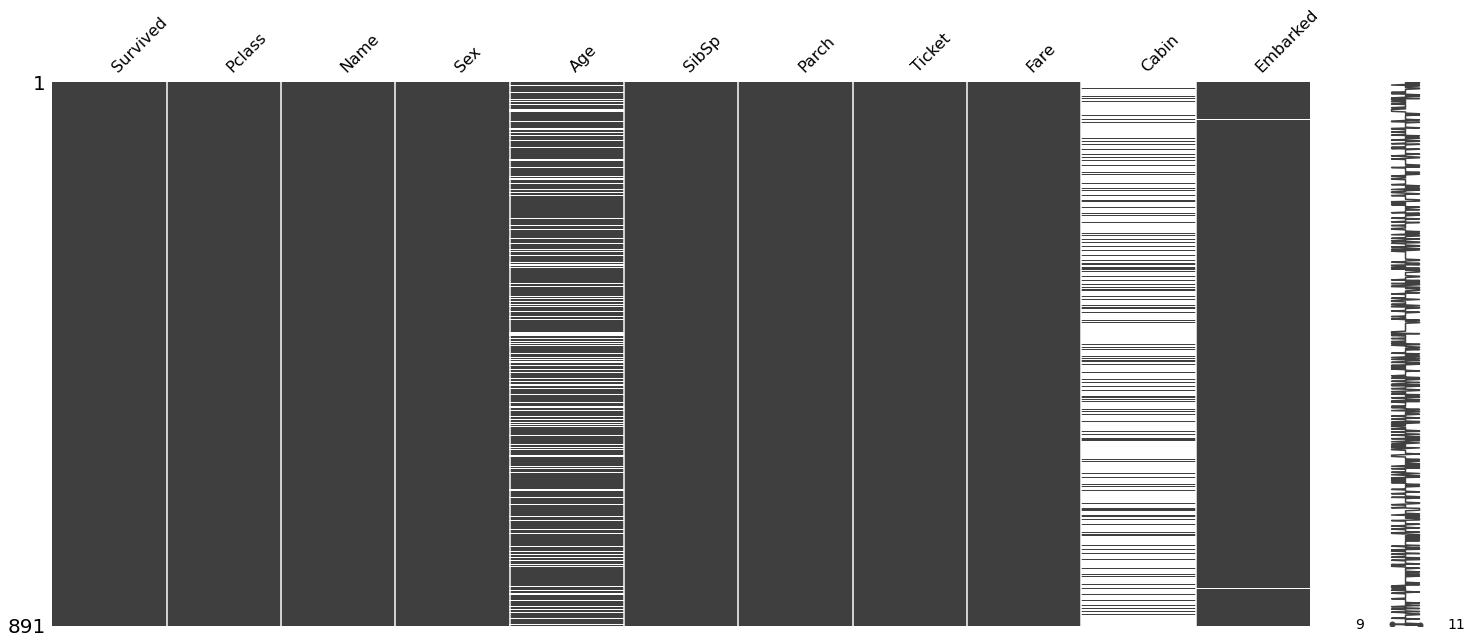

In [7]:
msno.matrix(train_set)

 Using the ‘heatmap’ function we can find if there are any correlations between missing data of different columns.

<AxesSubplot:>

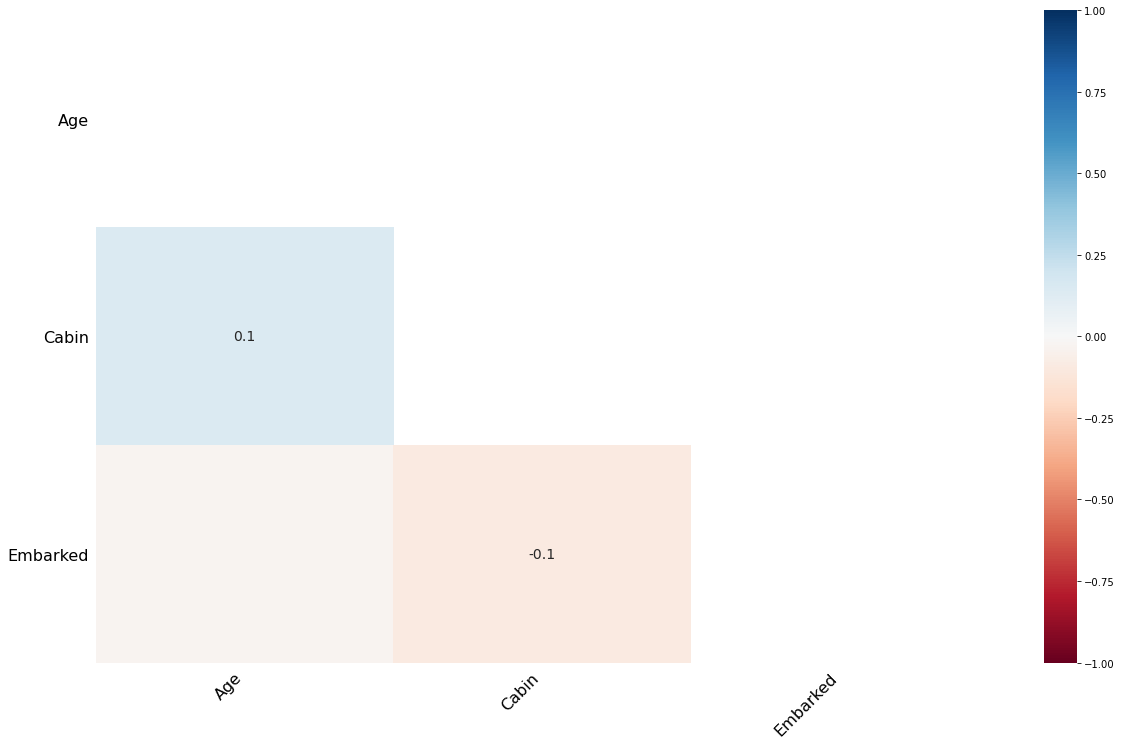

In [8]:
msno.heatmap(train_set)

The heatmap shows there is no such strong correlation between the missing data of the Age and Cabin column. So, the missing data of these columns can be classified as MAR or Missing at Random.

In [9]:
train_set= pd.get_dummies(train_set, columns=['Sex'])
train_set.dropna(axis=0,subset=['Embarked'], how='any', inplace=True)
train_set = pd.get_dummies(train_set, columns=['Embarked'])
train_set.drop('Name',axis='columns', inplace=True)
train_set.drop('Cabin',axis='columns', inplace=True)
train_set.drop('Ticket',axis='columns', inplace=True)

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_female  889 non-null    uint8  
 7   Sex_male    889 non-null    uint8  
 8   Embarked_C  889 non-null    uint8  
 9   Embarked_Q  889 non-null    uint8  
 10  Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


In [11]:
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


Predicting the missing values in the "Age" column with Regression

In [12]:
x_train = train_set.loc[train_set['Age'].notnull()]
y_train = x_train[['Age']]
x_train = x_train.drop('Age',axis='columns')
x_train = x_train.drop('Survived',axis='columns')

x_test = train_set.loc[train_set['Age'].isnull()]
x_test = x_test.drop('Age',axis='columns')
x_test = x_test.drop('Survived',axis='columns')

In [13]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(x_train, y_train)
y_pred = modelLR.predict(x_test)

In [14]:
train_set.loc[train_set['Age'].isnull(), 'Age'] = y_pred

###  Step 4: Data exploration & visualisation

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Sex_female'}>,
        <AxesSubplot:title={'center':'Sex_male'}>,
        <AxesSubplot:title={'center':'Embarked_C'}>],
       [<AxesSubplot:title={'center':'Embarked_Q'}>,
        <AxesSubplot:title={'center':'Embarked_S'}>, <AxesSubplot:>]],
      dtype=object)

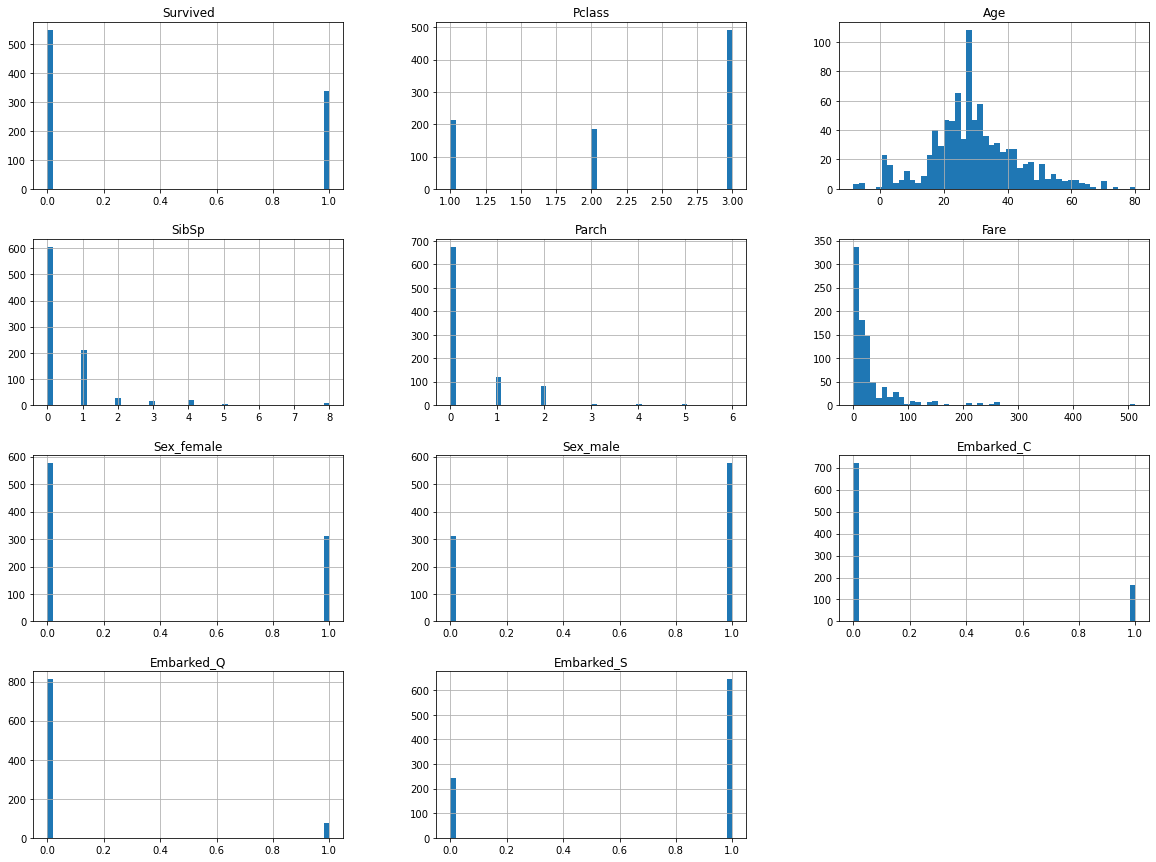

In [15]:
train_set.hist(bins=50, figsize=(20,15))

#### Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coeffcient  between every pair of attributes using the corr() method:

In [27]:
corr_matrix = train_set.corr()

In [28]:
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.055385,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.394824,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,-0.055385,-0.394824,1.000000,-0.388087,-0.226566,0.083984,-0.117022,0.117022,0.031378,-0.017412,-0.016532
SibSp,-0.034040,0.081656,-0.388087,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.226566,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.083984,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,0.541585,-0.127741,-0.117022,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,-0.541585,0.127741,0.117022,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,0.169966,-0.245733,0.031378,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.017412,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261


In [29]:
 corr_matrix["Survived"].sort_values(ascending=False)

Survived      1.000000
Sex_female    0.541585
Fare          0.255290
Embarked_C    0.169966
Parch         0.083151
Embarked_Q    0.004536
SibSp        -0.034040
Age          -0.055385
Embarked_S   -0.151777
Pclass       -0.335549
Sex_male     -0.541585
Name: Survived, dtype: float64

--> Women are more likly to survive

array([[<AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Survived', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

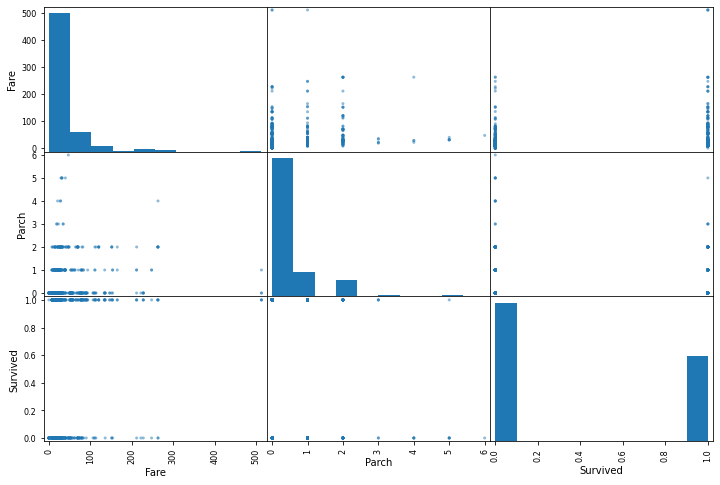

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["Fare", "Parch","Survived"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Survived', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

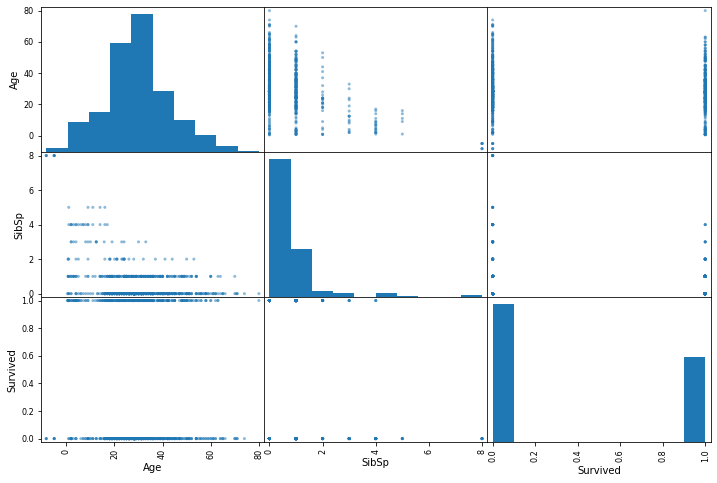

In [36]:
from pandas.plotting import scatter_matrix
attributes = ["Age", "SibSp","Survived"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

###  Step 5: Model building

In [16]:
X= train_set.drop('Survived',axis='columns');
y= train_set[['Survived']].values.ravel()

In [17]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='newton-cg', max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000, solver='newton-cg')

###  Step 6: Model Testing

In [18]:
test_set= pd.get_dummies(test_set, columns=['Sex'])
test_set = test_set.dropna(axis=0,subset=['Embarked'], how='any')
test_set = pd.get_dummies(test_set, columns=['Embarked'])
test_set = test_set.drop('Name',axis='columns')
test_set = test_set.drop('Cabin',axis='columns')
test_set = test_set.drop('Ticket',axis='columns')
test_set['Fare']=test_set['Fare'].replace(np.NaN,train_set['Fare'].median())

x_test = test_set.loc[test_set['Age'].isnull()]
x_test = x_test.drop('Age',axis='columns')
test_set.loc[test_set['Age'].isnull(), 'Age'] = modelLR.predict(x_test)

In [19]:
test_pred = model.predict(test_set)

In [25]:
submission = pd.DataFrame(test_pred)
submission = submission.rename(columns={0: 'Survived'})
submission.index = test_set.index
submission.to_csv('submission.csv', index=True)